<a href="https://colab.research.google.com/github/Vengadesh58/Pytorch/blob/main/PyTorch_WorkFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [15]:
!nvidia-smi

Mon Aug 26 07:29:27 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [16]:
torch.cuda.is_available()

True

In [17]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [18]:
what_were_covering = {1:"data loading",
                      2:"buil dmodel",
                      3:"fitting the model",
                      4:"making predictions",
                      5:"saving and loading",
                      6:"putting it all together",
                      }
what_were_covering

{1: 'data loading',
 2: 'buil dmodel',
 3: 'fitting the model',
 4: 'making predictions',
 5: 'saving and loading',
 6: 'putting it all together'}

In [19]:
import torch
from torch import nn # nn contains all of PyTorchs building blocks
import matplotlib.pyplot as plt
#check pyTorch version
torch.__version__

'2.3.1+cu121'

## 1. Data (Preparing and loading)

Data can be anything... in machine learning

* ecel
* Images of any kind
* videos
* Audio
* DNA
* Text

1. Get data into numerical representation
2. build a model to learn the patterns in that numerical representation

In [22]:
##  Data (Preparing and loading)

weight = 0.7
bias = 0.3

# create

start = 0
end = 10
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10],


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [23]:
len(X), len(y)

(500, 500)

### Splitting the data into training and test data


In [25]:
# create a train/test split

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)


(400, 400, 100, 100)

### Visualizing the data

In [40]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):

  """ Plots training data, test data and compares predictions"""
  plt.figure(figsize=(10,7))

  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  #Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Test data")

  if predictions is not None:

    #Plot predictions in red
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  #Show the legend
  plt.legend(prop={"size":10})
  plt.show()

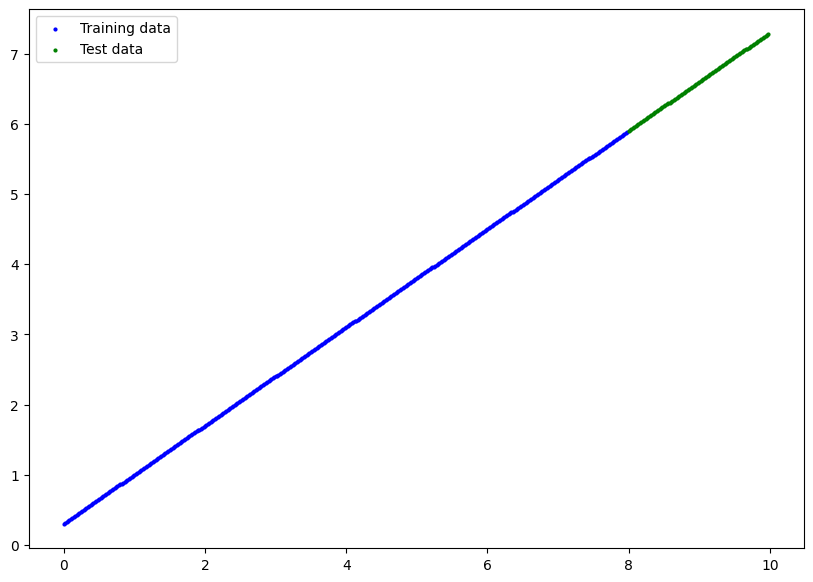

In [35]:
plot_predictions()

## Building a first PyTorch Model

In [42]:
# Create linear regression model class
class LinearRegressionModel(nn.Module):

  #constructor
  def __init__(self):
    super().__init__()

    # Initialize model parameters
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                          requires_grad=True,
                                          dtype=torch.float))

  #operations to perform
  #forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # x is the input data
    return self.weights * x + self.bias #this is the linear regression formula

### PyTorch model building essentials

* computatiol graphs

In [49]:
 ### checking the contents of our PyTorch Model

#create a radom seed
torch.manual_seed(42)

#create an instance of the model
model_0 = LinearRegressionModel()

#check the model parameters
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [50]:
# List the name parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making thr prediction using 'torch.inference_mode()'

In [52]:
#make prediction with model

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds[:10]

tensor([[2.8223],
        [2.8291],
        [2.8358],
        [2.8425],
        [2.8493],
        [2.8560],
        [2.8627],
        [2.8695],
        [2.8762],
        [2.8829]])

In [53]:
y_test[:10]

tensor([[5.9000],
        [5.9140],
        [5.9280],
        [5.9420],
        [5.9560],
        [5.9700],
        [5.9840],
        [5.9980],
        [6.0120],
        [6.0260]])

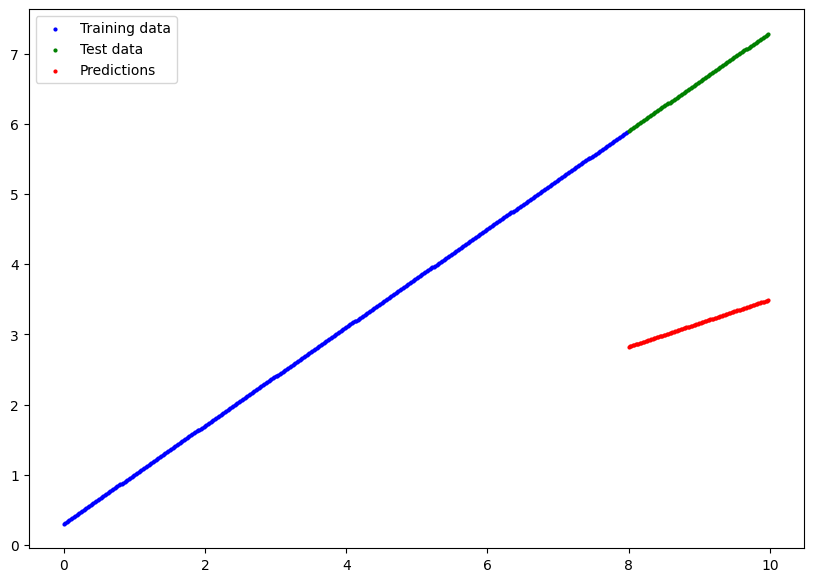

In [54]:
plot_predictions(predictions=y_preds)